### Loading Data/Checking Missing Values

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Load the dataset
#data = pd.read_csv('TimeSeriesData.csv')

# Preprocess the data
#msno.matrix(data)

# create a bar chart of null values by column
#msno.bar(

### Correlation Matrix

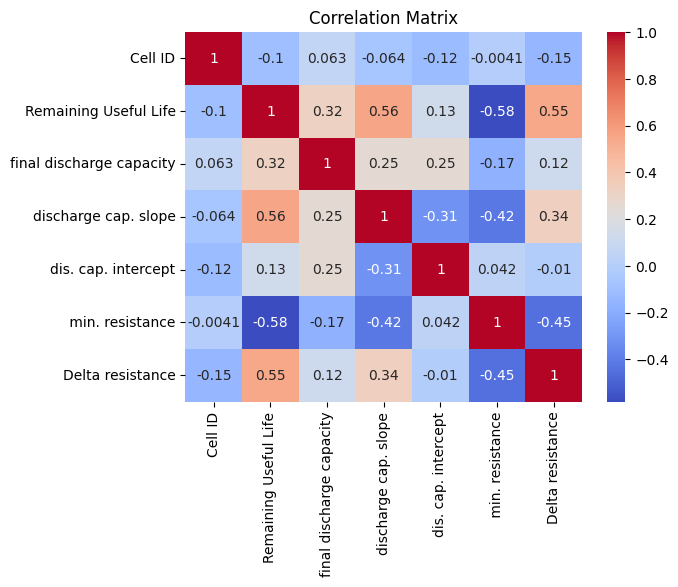

In [2]:
# Create correlation matrix
data2 = pd.read_csv('FeaturizedData.csv')
corr_matrix = data2.corr()

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Neural Network

In [4]:
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense
data2 = pd.read_csv('FeaturizedData.csv')


data2['initial discharge capacity'] = data2['initial discharge capacity'].str[1:]
data2['Delta_Variance'] = data2['Delta_Variance'].str[:len('Delta_Variance')-1]

#cols_to_check = [ 'final discharge capacity', 'dis. cap. intercept', ' min. resistance']
data2['initial discharge capacity'] = data2['initial discharge capacity'].astype(float)
data2['Delta_Variance'] = data2['Delta_Variance'].astype(float)

# Loop through the columns and find outliers
#for col in cols_to_check:
    #if data2[col].dtype == 'float64':
        #q1 = data2[col].quantile(0.25)
        #q3 = data2[col].quantile(0.75)
        #iqr = q3 - q1
        #data2 = data2[(data2[col] >= q1 - 1.5*iqr) & (data2[col] <= q3 + 1.5*iqr)]


#Model
X = data2[[ 'Cell ID', 'initial discharge capacity', 'final discharge capacity', 'discharge cap. slope',' min. resistance','dis. cap. intercept', 'Delta resistance', 'Delta_Variance']]
y = data2['Remaining Useful Life']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Scale the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)





2023-02-27 03:42:17.829514: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 03:42:17.829587: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 03:42:17.829595: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Epoch 1/100
2023-02-27 03:42:18.550916: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-27 03:42:18.550947: W ten

In [ ]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
data2 = pd.read_csv('FeaturizedData.csv')
data3 = pd.read_csv('FeaturizedDataPrediction.csv')
data2['initial discharge capacity'] = data2['initial discharge capacity'].str[1:].astype(float)
data2['Delta_Variance'] = data2['Delta_Variance'].str[:len('Delta_Variance')-1].astype(float)

data3 = data3.drop(' min. resistance', axis=1)
cols_to_check = ['Cell ID', 'initial discharge capacity', 'final discharge capacity', 'discharge cap. slope','dis. cap. intercept', 'Delta resistance', 'Delta_Variance']
# Loop through the columns and find outliers
#for col in cols_to_check:
    #if data2[col].dtype == 'float64':
        #q1 = data2[col].quantile(0.15)
        #q3 = data2[col].quantile(0.85)
        #iqr = q3 - q1
        #data2 = data2[(data2[col] >= q1 - 1.5*iqr) & (data2[col] <= q3 + 1.5*iqr)]
X = data2[['Cell ID', 'initial discharge capacity', 'final discharge capacity', 'discharge cap. slope','dis. cap. intercept', 'Delta resistance', 'Delta_Variance']]
y = data2['Remaining Useful Life']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=44)
#0.36, 0.32
# Scale the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#randmf = RandomForestRegressor(random_state=44)
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 6, min_samples_leaf= 2, max_features = 'sqrt', max_depth= None, bootstrap=False, random_state=44) 
randmf.fit(X_train, y_train)

rf_pred = randmf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)

print("Random Forest Regression MSE:", rf_mse)

test_predictions = randmf.predict(data3)
for i in range(0,19):
    test_predictions[i] = 10**(test_predictions[i])
submission = pd.DataFrame({
        "Cell ID": data3["Cell ID"],
        "Remaining Useful Life": test_predictions
    })

submission.to_csv("submission.csv", index=False)

Random Forest Regression MSE: 0.012190400035188807


## Modeling

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

data2 = pd.read_csv('FeaturizedData.csv')
data3 = pd.read_csv('FeaturizedDataPrediction.csv')

data2['initial discharge capacity'] = data2['initial discharge capacity'].str[1:].astype(float)
data2['Delta_Variance'] = data2['Delta_Variance'].str[:len('Delta_Variance')-1].astype(float)

cols_to_check = ['initial discharge capacity','final discharge capacity',
'dis. cap. intercept',
' min. resistance', 
'Delta_Variance']
# Loop through the columns and find outliers
#for col in cols_to_check:
    #if data2[col].dtype == 'float64':
      # q1 = data2[col].quantile(0.05)
      # q3 = data2[col].quantile(0.95)
       #iqr = q3 - q1
       #data2 = data2[(data2[col] >= q1 - 1.5*iqr) & (data2[col] <= q3 + 1.5*iqr)]

X = data2[['Cell ID', 'initial discharge capacity', 'final discharge capacity','discharge cap. slope', 'dis. cap. intercept', ' min. resistance', 'Delta resistance', 'Delta_Variance']]

y = data2['Remaining Useful Life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.36, random_state=44)

# Define the models
linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
svr_reg = SVR()
gb_reg = GradientBoostingRegressor()

# Train the models
linear_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)

# Make predictions on the test data
linear_pred = linear_reg.predict(X_test)
tree_pred = tree_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)
svr_pred = svr_reg.predict(X_test)
gb_pred = gb_reg.predict(X_test)

# Evaluate the models
linear_mse = mean_squared_error(y_test, linear_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
gb_mse = mean_squared_error(y_test, gb_pred)

# Print the mean squared error for each model
print("Linear Regression MSE:", linear_mse)
print("Decision Tree Regression MSE:", tree_mse)
print("Random Forest Regression MSE:", rf_mse)
print("Support Vector Regression MSE:", svr_mse)
print("Gradient Boosting Regression MSE:", gb_mse)

test_predictions = linear_reg.predict(data3)
for i in range(0,19):
    test_predictions[i] = 10**(test_predictions[i])
submission = pd.DataFrame({
        "Cell ID": data3["Cell ID"],
        "Remaining Useful Life": test_predictions
    })

submission.to_csv("submission_ken.csv", index=False)

Linear Regression MSE: 0.00979987570487099
Decision Tree Regression MSE: 0.011542481749533732
Random Forest Regression MSE: 0.00889832227106836
Support Vector Regression MSE: 0.02680283582736968
Gradient Boosting Regression MSE: 0.0094722797117188


## Random Forest with merged squashed Data

In [ ]:
# Import the necessary packages
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load your data
data = pd.read_csv('Time Series Data.csv')

# Preprocess your data
# ...
data.interpolate(inplace=True)

# Group by seconds respecting batteryId
data = data.sort_values(['batteryId', 'test_time'])

# Drop unnamed first column
data.pop(data.columns[0])

# Group by batteryId
data['test_time'] = pd.to_timedelta(data['test_time'], unit='s')
data.set_index('test_time', inplace=True)
data = data.groupby('batteryId').mean()
data.reset_index(inplace=True)

# Merge with featurized Data
data2 = pd.read_csv('FeaturizedData.csv')
data2['initial discharge capacity'] = data2['initial discharge capacity'].str[1:]
data2['Delta_Variance'] = data2['initial discharge capacity'].str[:-1]
data2renamed = data2.rename(columns={'Cell ID': "batteryId"})
mergedData = data.merge(data2renamed, on="batteryId")
# Drop the unnamed column of data series row id
mergedData = mergedData.iloc[:, 1:]

print(mergedData.columns)

X = mergedData.loc[ : , mergedData.columns != 'Remaining Useful Life']

y = mergedData['Remaining Useful Life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

randmf = RandomForestRegressor(n_estimators = 120, min_samples_split = 7, min_samples_leaf= 3, max_features = 'sqrt', max_depth= 15, bootstrap=False, random_state=44) 
randmf.fit(X_train, y_train)

randmf.fit(X_train, y_train)

rf_pred = randmf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)

print("Random Forest Regression MSE:", rf_mse)

data3 = pd.read_csv('FeaturizedDataPrediction.csv')
data4 = pd.read_csv("Time Series Prediction Data.csv")

data4 = data4.sort_values(['batteryId', 'test_time'])
data4.pop(data4.columns[0])

# Group by batteryId
data4['test_time'] = pd.to_timedelta(data4['test_time'], unit='s')
data4.set_index('test_time', inplace=True)
data4 = data4.groupby('batteryId').mean()
data4.reset_index(inplace=True)

# Merge with featurized Data
data3renamed = data3.rename(columns={'Cell ID': "batteryId"})
mergedData2 = data4.merge(data3renamed, on="batteryId")
mergedData2 = mergedData2.drop(columns=["batteryId"])

print(mergedData2.columns)

test_predictions = randmf.predict(mergedData2)
for i in range(0,19):
    test_predictions[i] = 10**(test_predictions[i])
submission = pd.DataFrame({
        "Cell ID": data3["Cell ID"],
        "Remaining Useful Life": test_predictions
    })

submission.to_csv("submission33.csv", index=False)

Index(['voltage', 'discharge_capacity', 'discharge_energy',
       'internal_resistance', 'cycle_index', 'current',
       'Remaining Useful Life', 'initial discharge capacity',
       'final discharge capacity', 'discharge cap. slope',
       'dis. cap. intercept', ' min. resistance', 'Delta resistance',
       'Delta_Variance'],
      dtype='object')
Random Forest Regression MSE: 0.00710670066487119
Index(['voltage', 'discharge_capacity', 'discharge_energy',
       'internal_resistance', 'cycle_index', 'current',
       'initial discharge capacity', 'final discharge capacity',
       'discharge cap. slope', 'dis. cap. intercept', ' min. resistance',
       'Delta resistance', 'Delta_Variance'],
      dtype='object')


## 

## Neural Network with the merged data

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold

data = pd.read_csv('FeaturizedData.csv')
data['initial discharge capacity'] = data['initial discharge capacity'].str[1:].astype(float)
data['Delta_Variance'] = data['Delta_Variance'].str[:len('Delta_Variance')-1].astype(float)

labels = data.pop('Remaining Useful Life')  # replace 'target_variable' with the name of your target variable
data = np.array(data)
labels = np.array(labels)

# Define the neural network architecture
def build_model(num_layers, num_neurons, learning_rate):
    model = keras.Sequential()
    
    # Add the input layer
    model.add(keras.layers.Dense(num_neurons, activation='relu', input_shape=(data.shape[1],)))
    
    # Add additional hidden layers
    for i in range(num_layers-1):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))
    
    # Add the output layer
    model.add(keras.layers.Dense(1, activation='linear'))
    
    # Set the optimizer and learning rate
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    
    return model

# Define the hyperparameters
num_layers = 100
num_neurons = 64
learning_rate = 0.0000001

# Perform 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
mae_scores = []
for train_idx, test_idx in kfold.split(data):
    train_data, train_labels = data[train_idx], labels[train_idx]
    test_data, test_labels = data[test_idx], labels[test_idx]
    
    model = build_model(num_layers, num_neurons, learning_rate)
    history = model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_split=0.2)
    test_loss, test_mae = model.evaluate(test_data, test_labels)
    mae_scores.append(test_mae)

# Print the average MAE across all folds
print('Mean MAE:', np.mean(mae_scores))

new_data = pd.read_csv('FeaturizedDataPrediction.csv')

# Make predictions on the new data
predictions = model.predict(new_data)


Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 5.3740 - mae: 2.3115 - val_loss: 5.2530 - val_mae: 2.2848
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 5.3740 - mae: 2.3115 - val_loss: 5.2530 - val_mae: 2.2848
Epoch 7/100
3/3 [==============================] - 0s 45ms/step - loss: 5.3740 - mae: 2.3115 - val_loss: 5.2529 - val_mae: 2.2848
Epoch 8/100
3/3 [==============================] - 0s 52ms/step - loss: 5.3740 - mae: 2.3115 - val_loss: 5.2529 - val_mae: 2.2848
Epoch 9/100
3/3 [==============================] - 0s 38ms/step - loss: 5.3740 - mae: 2.3115 - val_loss: 5.2529 - val_mae: 2.2848
Epoch 10/100
3/3 [==============================] - 0s 45ms/step - loss: 5.3739 - mae: 2.3115 - val_loss: 5.2529 - val_mae: 2.2848
Epoch 11/100
3/3 [==============================] - 0s 44ms/step - loss: 5.3739 - mae: 2.3115 - val_loss: 5.2529 - val_mae: 2.2848
Epoch 12/100
3/3 [==============================] - 0s 45ms/step - loss: 5.3739 - mae: 2

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0ef1226-5180-4f0d-8e9d-6fd554149d5c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>